In [208]:
import numpy as np
import kmeans
import common
import naive_em
import em
from typing import Tuple
X = np.loadtxt("toy_data.txt")

In [72]:
import kmeans
import common

In [24]:
K = [1,2,3,4]
Seed = [0,1,2,3,4]
cost_matrix = np.zeros((4,5))
cost_matrix

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [26]:
for i in range(0,4):
    for j in range(0,5):
        mixture, post = common.init(X, K = K[i], seed = Seed[j])
        mixture, post, cost = kmeans.run(X, mixture, post)
        cost_matrix[i,j] = cost
np.min(cost_matrix, axis = 1)

array([5462.29745234, 1684.9079503 , 1329.59486715, 1035.49982654])

In [177]:
import importlib
importlib.reload(naive_em)

<module 'naive_em' from '/Users/zhaozijie/Desktop/mit_micromaster/netflix/naive_em.py'>

In [382]:
X = np.array([[0.85794562, 0.84725174],
 [0.6235637 , 0.38438171],
 [0.29753461, 0.05671298],
 [0.27265629, 0.47766512],
 [0.81216873 ,0.47997717],
 [0.3927848 , 0.83607876],
 [0.33739616, 0.64817187],
 [0.36824154, 0.95715516],
 [0.14035078 ,0.87008726],
 [0.47360805 ,0.80091075],
 [0.52047748, 0.67887953],
 [0.72063265, 0.58201979],
 [0.53737323 ,0.75861562],
 [0.10590761 ,0.47360042],
 [0.18633234 ,0.73691818]])
K = 6
Mu = np.array([[0.6235637 ,0.38438171],
 [0.3927848 , 0.83607876],
 [0.81216873 ,0.47997717],
 [0.14035078, 0.87008726],
 [0.36824154 ,0.95715516],
 [0.10590761 ,0.47360042]])
Var = [0.10038354 ,0.07227467, 0.13240693, 0.12411825, 0.10497521, 0.12220856]
P = [0.1680912 , 0.15835331 ,0.21384187 ,0.14223565, 0.14295074, 0.17452722]

In [70]:
n, _ = X.shape
K, _ = Mu.shape
post = np.zeros((n, K))
prob = np.zeros((n, K))

for i in range(n):
    # claculate the probability sample i assign to a class j
    for j in range(K):
        x = X[i, :]
        var = Var[j]
        d = x.shape[0]
        mu = Mu[j,:]
        prob[i,j] = (np.power((var* 2*np.pi), -d/2)* \
                    np.exp(((-1/2) * \
                    (((np.transpose((x - mu))@(1/var*np.eye(d))) @ (x - mu))))))
    for k in range(K):
        post[i, k] = prob[i,k]*P[k]/np.dot(prob[i,:],P)
# calculate log likelinhood
np.sum(np.log(np.dot(prob,P)))

-5.592899125423124

In [64]:
from scipy.stats import multivariate_normal
prob = np.zeros((n, K))
for i in range(n):
    for j in range(K):
        prob[i,j] = multivariate_normal.pdf(X[i,:], mean = Mu[j,:], cov = Var[j])
prob

array([[0.41482631, 0.49245608, 0.71655954, 0.16075731, 0.45675873,
        0.0727311 ],
       [1.58546852, 0.37137783, 1.01527685, 0.19353174, 0.23294583,
        0.42114729],
       [0.54697777, 0.03094754, 0.22477522, 0.0807824 , 0.03113246,
        0.55037844],
       [0.82218449, 0.81944796, 0.40044244, 0.64260215, 0.48556845,
        1.16220676],
       [1.26894056, 0.27127304, 1.20201369, 0.11274716, 0.20048039,
        0.1691769 ],
       [0.44014525, 2.20208467, 0.38326229, 0.98736231, 1.40981892,
        0.54327961],
       [0.74556586, 1.68861904, 0.4611521 , 0.89928745, 0.95780856,
        0.92331955],
       [0.2235989 , 1.98143651, 0.2417056 , 1.00893185, 1.51611931,
        0.37753971],
       [0.15302168, 1.40574102, 0.12306331, 1.28228478, 1.14188706,
        0.68121669],
       [0.59732632, 2.08685228, 0.52845746, 0.8041    , 1.28017627,
        0.48319504],
       [0.97624778, 1.65805724, 0.75074111, 0.61833288, 0.93887851,
        0.54257185],
       [1.24531712, 0

In [134]:
post

array([[0.17354324, 0.1940846 , 0.38136555, 0.0569083 , 0.16250611,
        0.03159219],
       [0.39379906, 0.08689908, 0.32081104, 0.04067548, 0.04920547,
        0.10860986],
       [0.35788285, 0.01907566, 0.18709726, 0.04472511, 0.01732312,
        0.37389601],
       [0.1926843 , 0.18091751, 0.11938917, 0.12743324, 0.09677628,
        0.2827995 ],
       [0.36304946, 0.07311615, 0.43750366, 0.02729566, 0.04877956,
        0.05025552],
       [0.07858663, 0.37039816, 0.08705556, 0.14917384, 0.21407079,
        0.10071502],
       [0.13662023, 0.29150288, 0.10750309, 0.13944117, 0.14926196,
        0.17567066],
       [0.04532868, 0.3784127 , 0.06233585, 0.17307275, 0.26138351,
        0.07946652],
       [0.03479877, 0.30116078, 0.03560306, 0.24675099, 0.22083887,
        0.16084753],
       [0.1084787 , 0.35703165, 0.12209297, 0.1235681 , 0.19771701,
        0.09111156],
       [0.18151436, 0.29042408, 0.1775779 , 0.09728296, 0.14845737,
        0.10474333],
       [0.30076284, 0

In [65]:
np.sum(np.log(np.dot(prob,P)))

-5.592899125423124

In [46]:
post.shape

(15, 6)

In [52]:
-5.592899/-26.739465

0.20916271137062767

In [33]:
post

array([[0.17354324, 0.1940846 , 0.38136555, 0.0569083 , 0.16250611,
        0.03159219],
       [0.39379906, 0.08689908, 0.32081104, 0.04067548, 0.04920547,
        0.10860986],
       [0.35788285, 0.01907566, 0.18709726, 0.04472511, 0.01732312,
        0.37389601],
       [0.1926843 , 0.18091751, 0.11938917, 0.12743324, 0.09677628,
        0.2827995 ],
       [0.36304946, 0.07311615, 0.43750366, 0.02729566, 0.04877956,
        0.05025552],
       [0.07858663, 0.37039816, 0.08705556, 0.14917384, 0.21407079,
        0.10071502],
       [0.13662023, 0.29150288, 0.10750309, 0.13944117, 0.14926196,
        0.17567066],
       [0.04532868, 0.3784127 , 0.06233585, 0.17307275, 0.26138351,
        0.07946652],
       [0.03479877, 0.30116078, 0.03560306, 0.24675099, 0.22083887,
        0.16084753],
       [0.1084787 , 0.35703165, 0.12209297, 0.1235681 , 0.19771701,
        0.09111156],
       [0.18151436, 0.29042408, 0.1775779 , 0.09728296, 0.14845737,
        0.10474333],
       [0.30076284, 0

In [73]:
def mstep(X: np.ndarray, post: np.ndarray) -> GaussianMixture:
    """M-step: Updates the gaussian mixture by maximizing the log-likelihood
    of the weighted dataset

    Args:
        X: (n, d) array holding the data
        post: (n, K) array holding the soft counts
            for all components for all examples

    Returns:
        GaussianMixture: the new gaussian mixture
    """
    raise NotImplementedError

NameError: name 'GaussianMixture' is not defined

In [136]:
post=np.array([[0.15765074 ,0.20544344, 0.17314824, 0.15652173, 0.12169798 ,0.18553787],
 [0.1094766,  0.22310587, 0.24109142 ,0.0959303 , 0.19807563 ,0.13232018],
 [0.22679645, 0.36955206, 0.02836173 ,0.03478709, 0.00807236 ,0.33243031],
 [0.16670188, 0.18637975, 0.20964608, 0.17120102, 0.09886116 ,0.16721011],
 [0.04250305, 0.22996176 ,0.05151538, 0.33947585 ,0.18753121, 0.14901275],
 [0.09799086, 0.28677458, 0.16895715, 0.21054678 ,0.0069597 , 0.22877093],
 [0.16764519, 0.16897033, 0.25848053, 0.18674186 ,0.09846462, 0.11969746],
 [0.28655211, 0.02473762, 0.27387452, 0.27546459 ,0.08641467 ,0.05295649],
 [0.11353057 ,0.13090863, 0.20522811, 0.15786368, 0.35574052, 0.03672849],
 [0.10510461, 0.08116927, 0.3286373 , 0.12745369, 0.23464272, 0.12299241],
 [0.09757735, 0.06774952, 0.40286261, 0.08481828, 0.1206645 , 0.22632773],
 [0.24899344, 0.02944918, 0.25413459, 0.02914503, 0.29614373, 0.14213403],
 [0.35350682, 0.21890411, 0.26755234, 0.01418274, 0.10235276, 0.04350123],
 [0.15555757, 0.06236572, 0.16703133, 0.21760554, 0.03369562, 0.36374421],
 [0.1917808  ,0.08982788 ,0.17710673, 0.03179658, 0.19494387, 0.31454414]])

In [139]:
post

array([[0.15765074, 0.20544344, 0.17314824, 0.15652173, 0.12169798,
        0.18553787],
       [0.1094766 , 0.22310587, 0.24109142, 0.0959303 , 0.19807563,
        0.13232018],
       [0.22679645, 0.36955206, 0.02836173, 0.03478709, 0.00807236,
        0.33243031],
       [0.16670188, 0.18637975, 0.20964608, 0.17120102, 0.09886116,
        0.16721011],
       [0.04250305, 0.22996176, 0.05151538, 0.33947585, 0.18753121,
        0.14901275],
       [0.09799086, 0.28677458, 0.16895715, 0.21054678, 0.0069597 ,
        0.22877093],
       [0.16764519, 0.16897033, 0.25848053, 0.18674186, 0.09846462,
        0.11969746],
       [0.28655211, 0.02473762, 0.27387452, 0.27546459, 0.08641467,
        0.05295649],
       [0.11353057, 0.13090863, 0.20522811, 0.15786368, 0.35574052,
        0.03672849],
       [0.10510461, 0.08116927, 0.3286373 , 0.12745369, 0.23464272,
        0.12299241],
       [0.09757735, 0.06774952, 0.40286261, 0.08481828, 0.1206645 ,
        0.22632773],
       [0.24899344, 0

In [140]:
X

array([[0.85794562, 0.84725174],
       [0.6235637 , 0.38438171],
       [0.29753461, 0.05671298],
       [0.27265629, 0.47766512],
       [0.81216873, 0.47997717],
       [0.3927848 , 0.83607876],
       [0.33739616, 0.64817187],
       [0.36824154, 0.95715516],
       [0.14035078, 0.87008726],
       [0.47360805, 0.80091075],
       [0.52047748, 0.67887953],
       [0.72063265, 0.58201979],
       [0.53737323, 0.75861562],
       [0.10590761, 0.47360042],
       [0.18633234, 0.73691818]])

In [147]:
p_new = np.sum(post, axis = 0)/n
p_new

array([0.1680912 , 0.15835331, 0.21384187, 0.14223565, 0.14295074,
       0.17452722])

In [149]:
mu_new = np.dot(np.transpose(post),X)/(np.sum(post, axis = 0)).reshape(6,1)
mu_new

array([[0.43216722, 0.64675402],
       [0.46139681, 0.57129172],
       [0.44658753, 0.68978041],
       [0.44913747, 0.66937822],
       [0.47080526, 0.68008664],
       [0.40532311, 0.57364425]])

In [167]:
Sum = np.zeros((1,K))
new_var = np.zeros((1,K))
for i in range(n):
    for j in range(K):
        Sum[:,j] += post[i,j]*(np.linalg.norm(X[i,:]-mu_new[j,:]))**2
new_var = np.squeeze(Sum/(d*np.sum(post, axis = 0)))

In [169]:
new_var

array([0.05218451, 0.06230449, 0.03538519, 0.05174859, 0.04524244,
       0.05831186])

In [ ]:
1.Create 2 arrays: one for K, one for seeds.

2.Run an nested loop with

for i in K:
    for j in seeds:
3.for each iteration initialize via common.init(X, i, j), execute kmeans.run, then print the results.

4.For each K, copy the lowest value of cost.

In [214]:
importlib.reload(naive_em)
K = [1,2,3,4]
seed = [0,1,2,3,4]
LL_matrix = np.zeros((4,5))
for i in range(4):
    for j in range(5):
        mixture, post = common.init(X, K[i], seed[j])
        _, _, LL = naive_em.run(X, mixture, post)
        LL_matrix[i,j] = LL
LL_matrix

array([[-1307.22343176, -1307.22343176, -1307.22343176, -1307.22343176,
        -1307.22343176],
       [-1175.71468501, -1175.71486373, -1175.71462937, -1175.71467084,
        -1175.71464843],
       [-1138.89089969, -1138.89152686, -1138.89132325, -1138.89096017,
        -1138.8910558 ],
       [-1138.69786812, -1138.89104563, -1138.60358827, -1138.60157892,
        -1138.6011757 ]])

In [264]:
mixture, post = common.init(X, 4, 0)
mixture, post, cost = naive_em.run(X, mixture, post)
cost

-1138.6978681199807

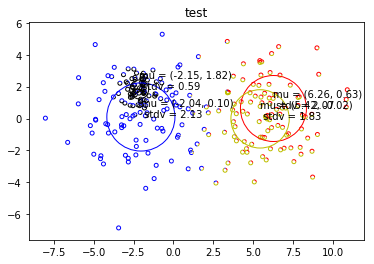

In [265]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Arc
_, K = post.shape
title = "test"

percent = post / post.sum(axis=1).reshape(-1, 1)
fig, ax = plt.subplots()
ax.title.set_text(title)
ax.set_xlim((-20, 20))
ax.set_ylim((-20, 20))
r = 0.25
color = ["r", "b", "k", "y", "m", "c"]
for i, point in enumerate(X):
    theta = 0
    for j in range(K):
        offset = percent[i, j] * 360
        arc = Arc(point,
                  r,
                  r,
                  0,
                  theta,
                  theta + offset,
                  edgecolor=color[j])
        ax.add_patch(arc)
        theta += offset
for j in range(K):
    mu = mixture.mu[j]
    sigma = np.sqrt(mixture.var.ravel()[j])
    circle = Circle(mu, sigma, color=color[j], fill=False)
    ax.add_patch(circle)
    legend = "mu = ({:0.2f}, {:0.2f})\n stdv = {:0.2f}".format(
        mu[0], mu[1], sigma)
    ax.text(mu[0], mu[1], legend)
plt.axis('equal')
plt.show()

In [267]:
mixture.mu.

array([[ 6.26126211,  0.62804622],
       [-2.0412143 ,  0.09657877],
       [-2.14764693,  1.82496579],
       [ 5.42411099, -0.02119474]])

In [527]:
X = np.loadtxt("netflix_complete.txt")

In [529]:
importlib.reload(common)
importlib.reload(naive_em)
K = 1
seed = [0,1,2,3,4]
BIC = []
for i in seed:
    mixture, post = common.init(X, K, i)
    mixture, post, cost = naive_em.run(X, mixture, post)
    BIC.append(cost)
BIC

[nan, nan, nan, nan, nan]

In [300]:
mixture, post = common.init(X, 1, 0)

In [301]:
a, b, cost = naive_em.run(X, mixture, post)

In [386]:
X = np.array([[0.22865032, 0.38574607, 0.      ,   0.        ],
 [0.     ,    0.         ,0.         ,0.        ],
 [0.82218752 ,0.95269925 ,0.25119665 ,0.73803058],
 [0.5202897  ,0.87235927 ,0.         ,0.38326043],
 [0.08463614 ,0.         ,0.         ,0.        ],
 [0.         ,0.19557112, 0.53146263 ,0.        ],
 [0.68865551 ,0.         ,0.        , 0.10153548],
 [0.         ,0.         ,0.85619172 ,0.        ],
 [0.         ,0.86627671 ,0.8746607  ,0.        ],
 [0.65596871, 0.97570881, 0.45895039 ,0.83562927]])
K = 8
Mu = np.array([[0.08463614, 0.      ,   0.   ,      0.        ],
 [0.82218752, 0.95269925 ,0.25119665, 0.73803058],
 [0.        , 0.19557112 ,0.53146263 ,0.        ],
 [0.22865032, 0.38574607,0.        , 0.        ],
 [0.        , 0.86627671 ,0.8746607 , 0.        ],
 [0.68865551 ,0.         ,0.        , 0.10153548],
 [0.         ,0.         ,0.85619172 ,0.        ],
 [0.        , 0.         ,0.        , 0.        ]])
Var = np.array([0.21217535 ,0.33192747, 0.18272628, 0.15711043, 0.28794066 ,0.23045856,
 0.27909779, 0.22308159])
P = np.array([0.1052816,  0.13928288, 0.11727634, 0.16243431 ,0.11100271, 0.10106359,
 0.13015759 ,0.13350098])

In [ ]:
from scipy.stats import multivariate_normal
prob = np.zeros((n, K))
for i in range(n):
    for j in range(K):
        prob[i,j] = multivariate_normal.pdf(X[i,:], mean = Mu[j,:], cov = Var[j])
prob

In [415]:
X

array([[0.22865032, 0.38574607, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.82218752, 0.95269925, 0.25119665, 0.73803058],
       [0.5202897 , 0.87235927, 0.        , 0.38326043],
       [0.08463614, 0.        , 0.        , 0.        ],
       [0.        , 0.19557112, 0.53146263, 0.        ],
       [0.68865551, 0.        , 0.        , 0.10153548],
       [0.        , 0.        , 0.85619172, 0.        ],
       [0.        , 0.86627671, 0.8746607 , 0.        ],
       [0.65596871, 0.97570881, 0.45895039, 0.83562927]])

In [429]:
indicator = np.zeros(X.shape)
for i in range (len(X)):
    for j in range (len(X[0])):
        if X[i,j] > 0 or X[i,j]<0:
            indicator[i,j]=1
        else:
            indicator[i,j]=0

In [439]:
n, _ = X.shape
K, _ = Mu.shape
post = np.zeros((n, K))
prob = np.zeros((n, K))
D = np.sum(np.where(X, 1, 0), axis=1)

for i in range(n):
    # calculate the probability sample i assign to a class j
    for j in range(K):
        x = X[i, :]
        var = Var[j]
        d = D[i]
        mu = Mu[j,:]
        prob[i,j] = (np.power((var*2*np.pi), -d/2)* \
                    np.exp(((-1/2)* \
                    (((indicator[i]*np.transpose((x - mu))@((1/var)* \
                    np.eye(np.transpose((x - mu)).shape[0])))@(indicator[i]*(x - mu)))))))
    for k in range(K):
        post[i, k] = prob[i,k]*P[k]/np.dot(prob[i,:],P)
# calculate log likelinhood
LL = np.sum(np.log(np.dot(prob,P)))
LL

-14.415936499911426

In [428]:
post

array([[0.13937406, 0.02549917, 0.09742684, 0.43302211, 0.0261555 ,
        0.08217457, 0.03663994, 0.15970781],
       [0.22757242, 0.01128156, 0.10720037, 0.18830233, 0.01756142,
        0.07764708, 0.07695197, 0.29348285],
       [0.01121783, 0.77700254, 0.01285345, 0.06849551, 0.04965963,
        0.05686271, 0.01177314, 0.01213519],
       [0.05217479, 0.3043913 , 0.04062906, 0.37764496, 0.05930026,
        0.08927351, 0.01849537, 0.05809076],
       [0.21939957, 0.01043137, 0.10737807, 0.22933974, 0.01411362,
        0.08954655, 0.06279148, 0.26699961],
       [0.1098507 , 0.0119832 , 0.30768146, 0.1522412 , 0.06896838,
        0.03663946, 0.17282399, 0.13981162],
       [0.15182038, 0.03808132, 0.05248986, 0.23534728, 0.00885825,
        0.32479856, 0.03899212, 0.14961222],
       [0.06401932, 0.00904604, 0.29677225, 0.0336003 , 0.09002677,
        0.02403739, 0.39488496, 0.08761296],
       [0.01815278, 0.04860713, 0.17965799, 0.04867293, 0.51006531,
        0.00757   , 0.160760

In [376]:
LL

-17.58434236112665

In [354]:
log_post2 = np.zeros((n,K))
for i in range(n):
    # claculate the probability sample i assign to a class j
    for j in range(K):
        log_post2[i, j]= np.exp(np.log(P[j]+1e-16)-\
                                (np.linalg.norm(indicator[i]*(X[i]-Mu[j]))**(2))/(2*Var[j])-(((sum(indicator[i])/2)* \
                                                                                             np.log(2*np.pi*Var[j]))))
log_post2

IndexError: index 10 is out of bounds for axis 0 with size 10

In [407]:
log_post1 = np.zeros((n,K))
for i in range(n):
    # claculate the probability sample i assign to a class j
    for j in range(K):
         log_post1[i,j]=np.log(p[j]+1e-16)- \
            (np.linalg.norm(indicator[i]*(X[i]-Mu[j]))*(2))/(2*Var[j])- \
            ((sum(indicator[i])/2)*np.log(2*np.pi*Var[j]))
log_post1

array([[-3.95247195, -4.92083784, -3.49571493, -1.77155377, -4.12417934,
        -4.80851449, -3.97659527, -4.20105113],
       [-1.7243135 , -1.71295243, -1.73002619, -1.78448305, -1.68315631,
        -1.83335334, -1.80823225, -1.85327268],
       [-9.06295559, -3.18302897, -9.49495512, -8.96399284, -7.2849478 ,
        -7.69634118, -8.59035812, -9.16447547],
       [-7.09355311, -4.23965875, -7.05825243, -6.12280027, -4.81682406,
        -6.43299267, -6.54055525, -7.22629394],
       [-1.86808092, -4.3024973 , -2.2622671 , -2.69466144, -2.27353046,
        -4.63939546, -2.3923233 , -2.40149781],
       [-4.68088754, -4.88025814, -1.86813727, -5.36433559, -4.89258843,
        -4.66083971, -3.72812812, -4.72948454],
       [-4.89858312, -4.40730819, -5.67766303, -4.76993988, -4.69354615,
        -2.20354619, -4.86402583, -5.31131715],
       [-5.90338342, -3.90314406, -3.57621576, -7.22763573, -2.04373603,
        -5.73361539, -2.08907425, -5.86012288],
       [-7.81385561, -4.34426447

In [336]:
indicator[1]

array([1., 1., 1., 1.])

In [535]:
X = np.array([[0.85794562, 0.84725174],
 [0.6235637 , 0.38438171],
 [0.29753461 ,0.05671298],
 [0.         ,0.47766512],
 [0.        , 0.        ],
 [0.3927848 , 0.        ],
 [0.        , 0.64817187],
 [0.36824154, 0.        ],
 [0.        , 0.87008726],
 [0.47360805 ,0.        ],
 [0.         ,0.        ],
 [0.         ,0.        ],
 [0.53737323 ,0.75861562],
 [0.10590761 ,0.        ],
 [0.18633234 ,0.        ]])
K = 6
post = np.array([[0.15765074, 0.20544344, 0.17314824 ,0.15652173, 0.12169798, 0.18553787],
 [0.1094766 , 0.22310587 ,0.24109142 ,0.0959303 , 0.19807563 ,0.13232018],
 [0.22679645 ,0.36955206 ,0.02836173 ,0.03478709 ,0.00807236 ,0.33243031],
 [0.16670188, 0.18637975 ,0.20964608 ,0.17120102, 0.09886116 ,0.16721011],
 [0.04250305, 0.22996176 ,0.05151538 ,0.33947585, 0.18753121 ,0.14901275],
 [0.09799086, 0.28677458 ,0.16895715 ,0.21054678, 0.0069597  ,0.22877093],
 [0.16764519, 0.16897033 ,0.25848053 ,0.18674186 ,0.09846462, 0.11969746],
 [0.28655211, 0.02473762 ,0.27387452, 0.27546459, 0.08641467, 0.05295649],
 [0.11353057, 0.13090863 ,0.20522811, 0.15786368, 0.35574052, 0.03672849],
 [0.10510461, 0.08116927 ,0.3286373 , 0.12745369, 0.23464272, 0.12299241],
 [0.09757735, 0.06774952 ,0.40286261, 0.08481828 ,0.1206645 , 0.22632773],
 [0.24899344, 0.02944918, 0.25413459, 0.02914503, 0.29614373, 0.14213403],
 [0.35350682 ,0.21890411 ,0.26755234, 0.01418274 ,0.10235276, 0.04350123],
 [0.15555757 ,0.06236572, 0.16703133, 0.21760554, 0.03369562, 0.36374421],
 [0.1917808 , 0.08982788, 0.17710673, 0.03179658, 0.19494387, 0.31454414]])

In [549]:
# construct indicator
indicator = np.zeros(X.shape)
for i in range (len(X)):
    for j in range (len(X[0])):
        if X[i,j] > 0 or X[i,j]<0:
            indicator[i,j]=1
        else:
            indicator[i,j]=0
D = np.sum(np.where(X, 1, 0), axis=1)
n, _ = X.shape
K = post.shape[1]
p = np.sum(post, axis = 0)/n
for i in range(K):
    mu = np.dot(np.transpose(post),X*indicator[i])/(np.sum(post, axis = 0)).reshape(K,1)[i]

ValueError: could not broadcast input array from shape (6,2) into shape (2)

In [545]:
mu

array([[0.28038909, 0.29498305],
       [0.30585746, 0.31966217],
       [0.25709132, 0.27752467],
       [0.        , 0.24484815],
       [0.        , 0.        ],
       [0.24016086, 0.        ]])

In [540]:
mu

array([[0.28038909, 0.29498305],
       [0.30585746, 0.31966217],
       [0.25709132, 0.27752467],
       [0.2275794 , 0.24484815],
       [0.21961097, 0.3161553 ],
       [0.24016086, 0.17163493]])

In [513]:
X*indicator[3]

array([[0.        , 0.84725174],
       [0.        , 0.38438171],
       [0.        , 0.05671298],
       [0.        , 0.47766512],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.64817187],
       [0.        , 0.        ],
       [0.        , 0.87008726],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.75861562],
       [0.        , 0.        ],
       [0.        , 0.        ]])

In [494]:
# only update those satisfy condition
if 

array([[0.28038909, 0.        ],
       [0.30585746, 0.        ],
       [0.25709132, 0.        ],
       [0.2275794 , 0.        ],
       [0.21961097, 0.        ],
       [0.24016086, 0.        ]])

In [503]:
var = np.zeros((1,K))
for i in range(n):
    for j in range(K):
        Sum[:,j] += post[i,j]*(np.linalg.norm(X[i,:]-mu[j,:]))**2
    var = np.squeeze(Sum/((D[i]+1e-6)*np.sum(post, axis = 0)))
for i in range(var.shape[0]):
    if var[i] < 0.25:
        var[i] = 0.25
var

array([2.25673831, 2.40930058, 2.24805941, 2.13905984, 2.60170479,
       1.58423685])

In [504]:
D

array([2, 2, 2, 1, 0, 1, 1, 1, 1, 1, 0, 0, 2, 1, 1])

In [496]:
indicator.shape

(15, 2)

In [469]:
X.shape #15 points, 

(15, 2)

In [481]:
X

array([[0.85794562, 0.84725174],
       [0.6235637 , 0.38438171],
       [0.29753461, 0.05671298],
       [0.        , 0.47766512],
       [0.        , 0.        ],
       [0.3927848 , 0.        ],
       [0.        , 0.64817187],
       [0.36824154, 0.        ],
       [0.        , 0.87008726],
       [0.47360805, 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.53737323, 0.75861562],
       [0.10590761, 0.        ],
       [0.18633234, 0.        ]])

In [480]:
indicator

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       [0., 1.],
       [0., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [1., 1.],
       [1., 0.],
       [1., 0.]])

In [550]:
np.dot(mixture.p, mixture.mu)

array([nan, nan, nan, ..., nan, nan, nan])

In [554]:
Mu.shape

(8, 4)

In [555]:
P.shape

(8,)

In [557]:
np.mean(np.dot(P, Mu))

0.2408788643191375